# CSCN8010 Project
**Team 8:**
- Ponnu Peter, 9058740
- Madalina Tilvan, 9058215

## Framing the Problem

The goal of this project is to build different machine learning models that cna accurately make predictions and estimate a country's happiness score based on socio-economic and political features that might affect that score.

To adress this problem, we will be exploring the following models:
1. Simple Linear Regression
2. Multiple Linear Regression
3. Random Forest Trees
4. K-Means
5. K-Nearest Neighbors
6. Decision Trees

### About the dataset
The *World Happiness Report* dataset contains features related to happiness, economic, social, and political indicators for different countries across multiple years.

**Number of Instances:** 4,000

**Number of Attributes:** 24 columns

**Timeframe:** 2005-2024

**Columns Overview:**

- `Country`: Name of the country.

- `Year`: The year of the record.

- `Happiness_Score`: A numerical value indicating the happiness level.

- `GDP_per_Capita`: Economic output per person.

- `Social_Support`: Level of social connections and support.

- `Healthy_Life_Expectancy`: Average life expectancy with good health. Life Expectancy at Birth, both sexes (years)

- `Freedom`: Perceived freedom in decision-making.

- `Generosity`: A measure of charitable behavior.

- `Corruption_Perception`: Perception of corruption in society.

- `Unemployment_Rate`: Percentage of unemployed individuals.

- `Education_Index`: A measure of education quality.

- `Population`: Total population of the country.

- `Urbanization_Rate`: Percentage of people living in urban areas. Annual Percentage of Population at Mid-Year Residing in Urban Areas

- `Life_Satisfaction`: A subjective measure of well-being.

- `Public_Trust`: Confidence in public institutions.

- `Mental_Health_Index`: A measure of overall mental health.

- `Income_Inequality`: Economic disparity metric.

- `Public_Health_Expenditure`: Government spending on health.

- `Climate_Index`: A measure of climate conditions.

- `Work_Life_Balance`: An index measuring work-life balance.

- `Internet_Access`: Percentage of population with internet.

- `Crime_Rate`: Reported crime level.

- `Political_Stability`: A measure of political security. and absence of violence/terrorism

- `Employment_Rate`: Percentage of employed individuals.

In [1]:
## import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [2]:
happiness_df = pd.read_csv("dataset/world_happiness_report.csv")
happiness_df

,Country,Year,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception,Unemployment_Rate,Education_Index,Population,Urbanization_Rate,Life_Satisfaction,Public_Trust,Mental_Health_Index,Income_Inequality,Public_Health_Expenditure,Climate_Index,Work_Life_Balance,Internet_Access,Crime_Rate,Political_Stability,Employment_Rate
0,China,2022,4.39,44984.68,0.53,71.11,0.41,-0.05,0.83,14.98,0.52,1311940760,78.71,8.88,0.34,76.44,46.06,8.92,62.75,8.59,74.40,70.30,0.29,61.38
1,UK,2015,5.49,30814.59,0.93,63.14,0.89,0.04,0.84,19.46,0.83,1194240877,50.87,5.03,0.72,53.38,46.43,4.43,53.11,8.76,91.74,73.32,0.76,80.18
2,Brazil,2009,4.65,39214.84,0.03,62.36,0.01,0.16,0.59,16.68,0.95,731100898,48.75,5.22,0.23,82.40,31.03,3.78,33.30,6.06,71.80,28.99,0.94,72.65
3,France,2019,5.20,30655.75,0.77,78.94,0.98,0.25,0.63,2.64,0.70,1293957314,81.78,5.69,0.68,46.87,57.65,4.43,90.59,6.36,86.16,45.76,0.48,55.14
4,China,2022,7.28,30016.87,0.05,50.33,0.62,0.18,0.92,7.70,0.92,1432971455,82.39,6.33,0.50,60.38,28.54,7.66,59.33,3.00,71.10,65.67,0.12,51.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,South Africa,2005,7.43,1504.73,0.17,50.20,0.99,0.27,0.69,2.16,0.70,934088568,37.02,5.71,0.96,83.55,25.65,6.69,66.67,8.18,91.14,28.88,0.07,85.95
3996,India,2018,5.71,50182.85,0.96,67.67,0.84,0.43,0.88,7.19,0.94,1143441630,30.77,7.59,0.70,89.03,41.70,9.57,82.84,8.42,83.05,55.50,0.74,91.96
3997,South Africa,2021,6.23,6158.53,0.22,67.08,0.42,0.19,0.10,2.25,0.93,1175677845,55.66,4.71,0.59,67.74,24.58,8.02,81.29,6.97,72.08,61.16,0.29,89.19
3998,Brazil,2014,5.73,38214.54,0.46,55.72,0.74,0.28,0.46,8.74,0.78,1163097834,50.39,6.29,0.21,62.73,56.21,5.60,30.44,4.67,87.21,49.50,0.11,85.44


In [3]:
happiness_df2 = pd.read_csv("dataset/World Happiness Report (2005-2023).csv")
happiness_df2

,Country,Year,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776
...,...,...,...,...,...,...,...,...,...
2331,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831
2332,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789
2333,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757
2334,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.070,0.753


## Data Preprocessing

### 1. Detect and handle outliers

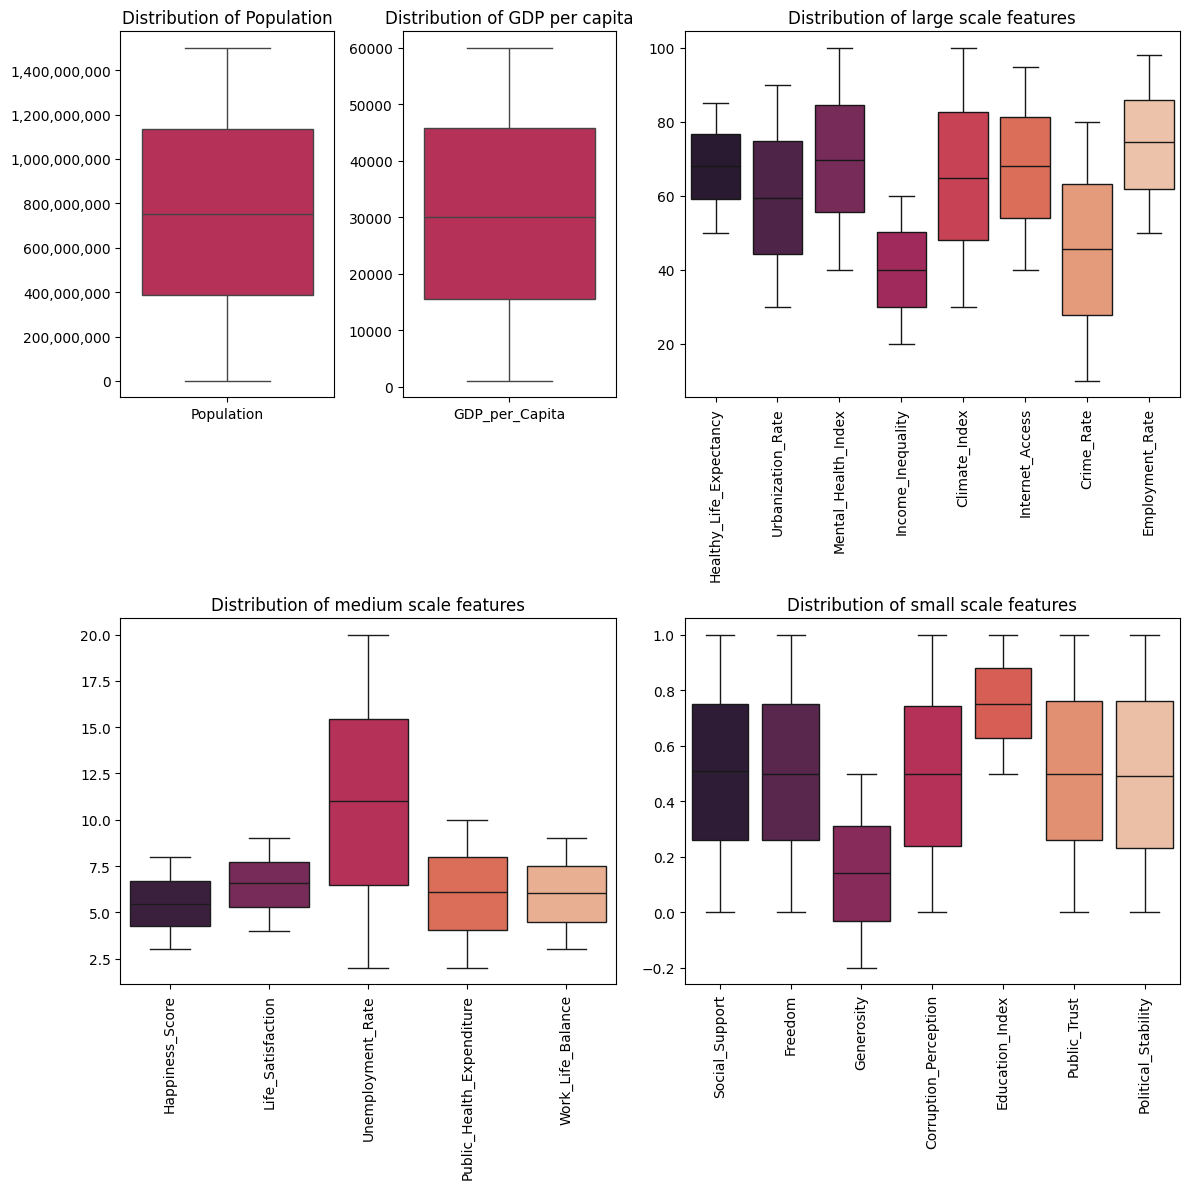

In [5]:
population_col = ['Population']
gdp_col = ['GDP_per_Capita']
small_scale_cols = ['Social_Support', 'Freedom', 'Generosity', 'Corruption_Perception', 'Education_Index','Public_Trust', 'Political_Stability'] 
medium_scale_cols = ['Happiness_Score','Life_Satisfaction','Unemployment_Rate', 'Public_Health_Expenditure', 'Work_Life_Balance']
large_scale_cols = ['Healthy_Life_Expectancy', 'Urbanization_Rate', 'Mental_Health_Index', 'Income_Inequality', 'Climate_Index', 'Internet_Access', 'Crime_Rate', 'Employment_Rate'] 

# Create subplots
fig = plt.figure(figsize=(12, 12))
gs = plt.GridSpec(nrows=2, ncols=4, figure=fig)

# Subplot for population
ax1 = fig.add_subplot(gs[0, 0]) 
sns.boxplot(data=happiness_df[population_col], palette="rocket", ax=ax1)
ax1.set_title("Distribution of Population")
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y):,}'))

# Subplot for GDP per capita
ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(data=happiness_df[gdp_col], palette="rocket", ax=ax2)
ax2.set_title("Distribution of GDP per capita")

# Subplot for large scale features
ax3 = fig.add_subplot(gs[0, 2:4])
sns.boxplot(data=happiness_df[large_scale_cols], palette="rocket", ax=ax3)
ax3.set_title("Distribution of large scale features")
ax3.tick_params(axis='x', rotation=90)

# Subplot for medium scale features
ax4 = fig.add_subplot(gs[1, 0:2])
sns.boxplot(data=happiness_df[medium_scale_cols], palette="rocket", ax=ax4)
ax4.set_title("Distribution of medium scale features")
ax4.tick_params(axis='x', rotation=90)

# Subplot for small scale features
ax5 = fig.add_subplot(gs[1, 2:4])
sns.boxplot(data=happiness_df[small_scale_cols], palette="rocket", ax=ax5)
ax5.set_title("Distribution of small scale features")
ax5.tick_params(axis='x', rotation=90)

# Show the plots
plt.tight_layout()
plt.show()

We have a large distribution of scales for our features, ranging from ***1.4 billion*** for `Population` to ***-0.2*** for `Generosity` column. As for outliers, the data seems to be clean of any extreme values.

### 2. Handle missing values

Our dataset is free of any missing values.

In [6]:
happiness_df.isnull().sum()

Country                      0
Year                         0
Happiness_Score              0
GDP_per_Capita               0
Social_Support               0
Healthy_Life_Expectancy      0
Freedom                      0
Generosity                   0
Corruption_Perception        0
Unemployment_Rate            0
Education_Index              0
Population                   0
Urbanization_Rate            0
Life_Satisfaction            0
Public_Trust                 0
Mental_Health_Index          0
Income_Inequality            0
Public_Health_Expenditure    0
Climate_Index                0
Work_Life_Balance            0
Internet_Access              0
Crime_Rate                   0
Political_Stability          0
Employment_Rate              0
dtype: int64

### 3. Investigate the existence of errors/inconsistencies
Let's check for duplicates, data types of logical inconsistencies that don't make sense in our dataset.


In [7]:
happiness_df.dtypes

Country                       object
Year                           int64
Happiness_Score              float64
GDP_per_Capita               float64
Social_Support               float64
Healthy_Life_Expectancy      float64
Freedom                      float64
Generosity                   float64
Corruption_Perception        float64
Unemployment_Rate            float64
Education_Index              float64
Population                     int64
Urbanization_Rate            float64
Life_Satisfaction            float64
Public_Trust                 float64
Mental_Health_Index          float64
Income_Inequality            float64
Public_Health_Expenditure    float64
Climate_Index                float64
Work_Life_Balance            float64
Internet_Access              float64
Crime_Rate                   float64
Political_Stability          float64
Employment_Rate              float64
dtype: object

In [8]:
happiness_df.describe()

,Year,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception,Unemployment_Rate,Education_Index,Population,Urbanization_Rate,Life_Satisfaction,Public_Trust,Mental_Health_Index,Income_Inequality,Public_Health_Expenditure,Climate_Index,Work_Life_Balance,Internet_Access,Crime_Rate,Political_Stability,Employment_Rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2014.670750,5.455005,30482.009953,0.505860,67.917605,0.502723,0.143960,0.498920,10.966748,0.750385,7.582057e+08,59.624738,6.516438,0.502812,69.976853,40.002648,6.009270,65.176380,5.987325,67.586327,45.526322,0.494105,74.021450
std,5.724075,1.427370,17216.122032,0.286202,10.172091,0.285219,0.200088,0.288866,5.210712,0.144819,4.318611e+08,17.424544,1.434278,0.289186,17.128536,11.634987,2.291172,19.981357,1.725363,15.769023,20.300069,0.293191,13.906888
min,2005.000000,3.000000,1009.310000,0.000000,50.000000,0.000000,-0.200000,0.000000,2.000000,0.500000,5.718720e+05,30.010000,4.000000,0.000000,40.000000,20.010000,2.010000,30.010000,3.000000,40.010000,10.030000,0.000000,50.000000
25%,2010.000000,4.237500,15425.125000,0.260000,59.177500,0.260000,-0.030000,0.240000,6.450000,0.630000,3.874246e+08,44.367500,5.267500,0.260000,55.580000,29.865000,4.040000,48.170000,4.460000,53.910000,27.840000,0.230000,61.867500
50%,2015.000000,5.430000,29991.255000,0.510000,68.015000,0.500000,0.140000,0.500000,10.995000,0.750000,7.507210e+08,59.485000,6.570000,0.500000,69.650000,40.015000,6.070000,64.755000,6.020000,68.015000,45.760000,0.490000,74.475000
75%,2020.000000,6.662500,45763.085000,0.750000,76.690000,0.750000,0.310000,0.742500,15.450000,0.880000,1.134393e+09,74.987500,7.720000,0.760000,84.582500,50.187500,8.010000,82.652500,7.490000,81.332500,63.197500,0.760000,85.912500
max,2024.000000,8.000000,59980.720000,1.000000,85.000000,1.000000,0.500000,1.000000,19.990000,1.000000,1.499708e+09,90.000000,9.000000,1.000000,100.000000,59.970000,10.000000,99.990000,9.000000,94.990000,79.990000,1.000000,98.000000


The happiness dataset contains several features with different types of scales, as we observed earlier. These scales range from percentages and proportions (values between 0 and 1) to rates or large numerical values. Some features (`Social_Support`, `Freedom`, `Corruption_Perception`, `Public_Trust`, `Political_Stability`) are between 0 and 1, suggesting they might represent percentages or ratios. In contrast, other features have values ranging from 0 to 100 or even larger scales (in millions or billions).

This inconsistency in scales needs to be adressed to prevent models from being biased towards features with larger scales. In the next section, we will standardize and normalize the data to bring all the features to more comparable scales.

### 4. Feature engineering

Let's create a new column by combining `Public_Health_Epxenditure` and `Mental_Health_Index`. This new feature will help capture if investments in public health systems affect the mental health in each country. This will show if happiness is influenced by the prioritization of public mental health.

In [9]:
happiness_df['Mental_Health_Expenditure_Factor'] = happiness_df['Public_Health_Expenditure'] * happiness_df['Mental_Health_Index']

### 5. Normalize numerical features

I'll use Z-score normalization to ensure that all features have the same scale.


In [16]:
numerical_features = happiness_df.iloc[:, 2:]

for col in numerical_features.columns:
    scaler = StandardScaler()
    numerical_features[col] = scaler.fit_transform(numerical_features[[col]])

print("Numerical features summary statistics:")
display(numerical_features.describe())

print("\nFirst 5 rows for numerical features:")
display(numerical_features.head())


Numerical features summary statistics:


,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception,Unemployment_Rate,Education_Index,Population,Urbanization_Rate,Life_Satisfaction,Public_Trust,Mental_Health_Index,Income_Inequality,Public_Health_Expenditure,Climate_Index,Work_Life_Balance,Internet_Access,Crime_Rate,Political_Stability,Employment_Rate,Mental_Health_Expenditure_Factor
count,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03
mean,6.989964e-16,-3.197442e-17,8.881784e-17,5.133671e-16,-2.522427e-16,-2.664535e-17,-1.172396e-16,-3.996803e-16,2.158274e-16,-7.416290e-17,-1.108003e-16,-2.331468e-16,1.287859e-17,-4.014566e-16,-1.589839e-16,-3.428369e-16,2.611245e-16,-6.430412e-16,2.486900e-16,3.552714e-17,-5.506706e-17,-1.101341e-16,1.905143e-16
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-1.720165e+00,-1.712138e+00,-1.767716e+00,-1.761668e+00,-1.762804e+00,-1.719257e+00,-1.727385e+00,-1.721045e+00,-1.729163e+00,-1.754565e+00,-1.699811e+00,-1.754717e+00,-1.738933e+00,-1.750331e+00,-1.718536e+00,-1.745731e+00,-1.760180e+00,-1.731635e+00,-1.748984e+00,-1.748800e+00,-1.685475e+00,-1.727522e+00,-1.735922e+00
25%,-8.530775e-01,-8.746899e-01,-8.591520e-01,-8.593315e-01,-8.511100e-01,-8.695254e-01,-8.964453e-01,-8.669281e-01,-8.313809e-01,-8.586731e-01,-8.757271e-01,-8.708866e-01,-8.397458e-01,-8.406236e-01,-8.714161e-01,-8.596109e-01,-8.512188e-01,-8.853302e-01,-8.673991e-01,-8.713534e-01,-9.009062e-01,-8.740611e-01,-8.127382e-01
50%,-1.752042e-02,-2.850911e-02,1.446713e-02,9.575925e-03,-9.546486e-03,-1.979375e-02,3.739228e-03,5.422682e-03,-2.658817e-03,-1.733345e-02,-8.020581e-03,3.734924e-02,-9.726786e-03,-1.908472e-02,1.061801e-03,2.650940e-02,-2.109129e-02,1.894041e-02,2.718787e-02,1.151261e-02,-1.400284e-02,3.261741e-02,-1.198029e-01
75%,8.460637e-01,8.877136e-01,8.531415e-01,8.625062e-01,8.670822e-01,8.299379e-01,8.433344e-01,8.604992e-01,8.951235e-01,8.711920e-01,8.817839e-01,8.392465e-01,8.894605e-01,8.528151e-01,8.754738e-01,8.733436e-01,8.747306e-01,8.710415e-01,8.718290e-01,8.706072e-01,9.070122e-01,8.551544e-01,6.611923e-01
max,1.783219e+00,1.713649e+00,1.726761e+00,1.679550e+00,1.743711e+00,1.779638e+00,1.734863e+00,1.731890e+00,1.723846e+00,1.717207e+00,1.743464e+00,1.731793e+00,1.719480e+00,1.753034e+00,1.716362e+00,1.742003e+00,1.742523e+00,1.746329e+00,1.738034e+00,1.697925e+00,1.725692e+00,1.724437e+00,2.903652e+00



First 5 rows for numerical features:


,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception,Unemployment_Rate,Education_Index,Population,Urbanization_Rate,Life_Satisfaction,Public_Trust,Mental_Health_Index,Income_Inequality,Public_Health_Expenditure,Climate_Index,Work_Life_Balance,Internet_Access,Crime_Rate,Political_Stability,Employment_Rate,Mental_Health_Expenditure_Factor
0,-0.746224,0.842494,0.084357,0.313878,-0.325133,-0.969494,1.146281,0.770289,-1.591043,1.282367,1.095446,1.648117,-0.563073,0.377379,0.520680,1.270570,-0.121447,1.508668,0.432146,1.220527,-0.696236,-0.909120,1.334799
1,0.024520,0.019320,1.482147,-0.469736,1.357994,-0.519636,1.180904,1.630164,0.549823,1.009791,-0.502500,-1.036496,0.751124,-0.969080,0.552485,-0.689371,-0.603957,1.607211,1.531908,1.369313,0.907012,0.442897,-0.943494
2,-0.564048,0.507311,-1.662882,-0.546426,-1.727739,0.080175,0.315342,1.096581,1.378545,-0.062771,-0.624183,-0.904008,-0.943498,0.725380,-0.771275,-0.973104,-1.595506,0.042127,0.267245,-0.814696,1.521022,-0.098629,-0.559839
3,-0.178676,0.010093,0.923031,1.083727,1.673581,0.530033,0.453831,-1.598206,-0.347960,1.240720,1.271656,-0.576276,0.612788,-1.349195,1.516938,-0.689371,1.272026,0.216025,1.178005,0.011513,-0.048115,-1.357875,-1.091021
4,1.278732,-0.027021,-1.592992,-1.729222,0.411235,0.180143,1.457883,-0.627008,1.171364,1.562655,1.306669,-0.130003,-0.009727,-0.560355,-0.985311,0.720564,-0.292628,-1.731635,0.222849,0.992420,-1.276135,-1.616052,0.212798


In [17]:
happiness_merged = pd.concat([happiness_df[['Country', 'Year']], numerical_features], axis = 1)
happiness_merged.isna().sum()

Country                             0
Year                                0
Happiness_Score                     0
GDP_per_Capita                      0
Social_Support                      0
Healthy_Life_Expectancy             0
Freedom                             0
Generosity                          0
Corruption_Perception               0
Unemployment_Rate                   0
Education_Index                     0
Population                          0
Urbanization_Rate                   0
Life_Satisfaction                   0
Public_Trust                        0
Mental_Health_Index                 0
Income_Inequality                   0
Public_Health_Expenditure           0
Climate_Index                       0
Work_Life_Balance                   0
Internet_Access                     0
Crime_Rate                          0
Political_Stability                 0
Employment_Rate                     0
Mental_Health_Expenditure_Factor    0
dtype: int64

### 6. Encode categorical variables


In [18]:
countries_encoded = pd.get_dummies(happiness_merged['Country'], sparse = True, dtype='int')
countries_encoded

,Australia,Brazil,Canada,China,France,Germany,India,South Africa,UK,USA
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,1,0,0
3996,0,0,0,0,0,0,1,0,0,0
3997,0,0,0,0,0,0,0,1,0,0
3998,0,1,0,0,0,0,0,0,0,0


Now, let's merge it with our dataset.

In [19]:
happiness_merged = pd.concat([happiness_merged, countries_encoded], axis =1)
happiness_merged = happiness_merged.drop(columns='Country')
happiness_merged.head()

,Year,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception,Unemployment_Rate,Education_Index,Population,Urbanization_Rate,Life_Satisfaction,Public_Trust,Mental_Health_Index,Income_Inequality,Public_Health_Expenditure,Climate_Index,Work_Life_Balance,Internet_Access,Crime_Rate,Political_Stability,Employment_Rate,Mental_Health_Expenditure_Factor,Australia,Brazil,Canada,China,France,Germany,India,South Africa,UK,USA
0,2022,-0.746224,0.842494,0.084357,0.313878,-0.325133,-0.969494,1.146281,0.770289,-1.591043,1.282367,1.095446,1.648117,-0.563073,0.377379,0.520680,1.270570,-0.121447,1.508668,0.432146,1.220527,-0.696236,-0.909120,1.334799,0,0,0,1,0,0,0,0,0,0
1,2015,0.024520,0.019320,1.482147,-0.469736,1.357994,-0.519636,1.180904,1.630164,0.549823,1.009791,-0.502500,-1.036496,0.751124,-0.969080,0.552485,-0.689371,-0.603957,1.607211,1.531908,1.369313,0.907012,0.442897,-0.943494,0,0,0,0,0,0,0,0,1,0
2,2009,-0.564048,0.507311,-1.662882,-0.546426,-1.727739,0.080175,0.315342,1.096581,1.378545,-0.062771,-0.624183,-0.904008,-0.943498,0.725380,-0.771275,-0.973104,-1.595506,0.042127,0.267245,-0.814696,1.521022,-0.098629,-0.559839,0,1,0,0,0,0,0,0,0,0
3,2019,-0.178676,0.010093,0.923031,1.083727,1.673581,0.530033,0.453831,-1.598206,-0.347960,1.240720,1.271656,-0.576276,0.612788,-1.349195,1.516938,-0.689371,1.272026,0.216025,1.178005,0.011513,-0.048115,-1.357875,-1.091021,0,0,0,0,1,0,0,0,0,0
4,2022,1.278732,-0.027021,-1.592992,-1.729222,0.411235,0.180143,1.457883,-0.627008,1.171364,1.562655,1.306669,-0.130003,-0.009727,-0.560355,-0.985311,0.720564,-0.292628,-1.731635,0.222849,0.992420,-1.276135,-1.616052,0.212798,0,0,0,1,0,0,0,0,0,0


## Principal Component Analysis (PCA)

In [20]:
def perform_pca_analysis(dataset):
    # Apply PCA (keep all components)
    pca = PCA(n_components=len(dataset.columns))
    pca.fit(dataset)

    # Get explained variance
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    # Find the minimum number of components that explain at least 90% variance
    num_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

    # Plot explained variance
    plt.figure(figsize=(18, 8))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='b', label="Explained Variance")
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r', label="Cumulative Explained Variance")
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Variance Explained')
    plt.title('Explained and Cumulative Variance by Principal Components')
    plt.xticks(range(1, len(explained_variance) + 1))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Create a DataFrame to show explained variance
    explained_variance_df = pd.DataFrame({
        "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance))],
        "Explained Variance Ratio": explained_variance,
        "Cumulative Variance": cumulative_variance
    })

    # Print explained variance DataFrame
    print("\nExplained Variance Analysis:")
    print(explained_variance_df)

    # Get PCA component vectors (eigenvectors)
    pca_components_df = pd.DataFrame(pca.components_, columns=dataset.columns, index=[f"PC{i+1}" for i in range(len(dataset.columns))])

    # Print PCA component vectors
    print("\nPCA Component Vectors (Eigenvectors):")
    print(pca_components_df)
    return num_components_90 

c:\Users\Madalina\OneDrive - Conestoga College\Conestoga\January-April\Foundations of Machine Learning Frameworks\CSCN8010\venv\CSCN8010_classical_ml\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


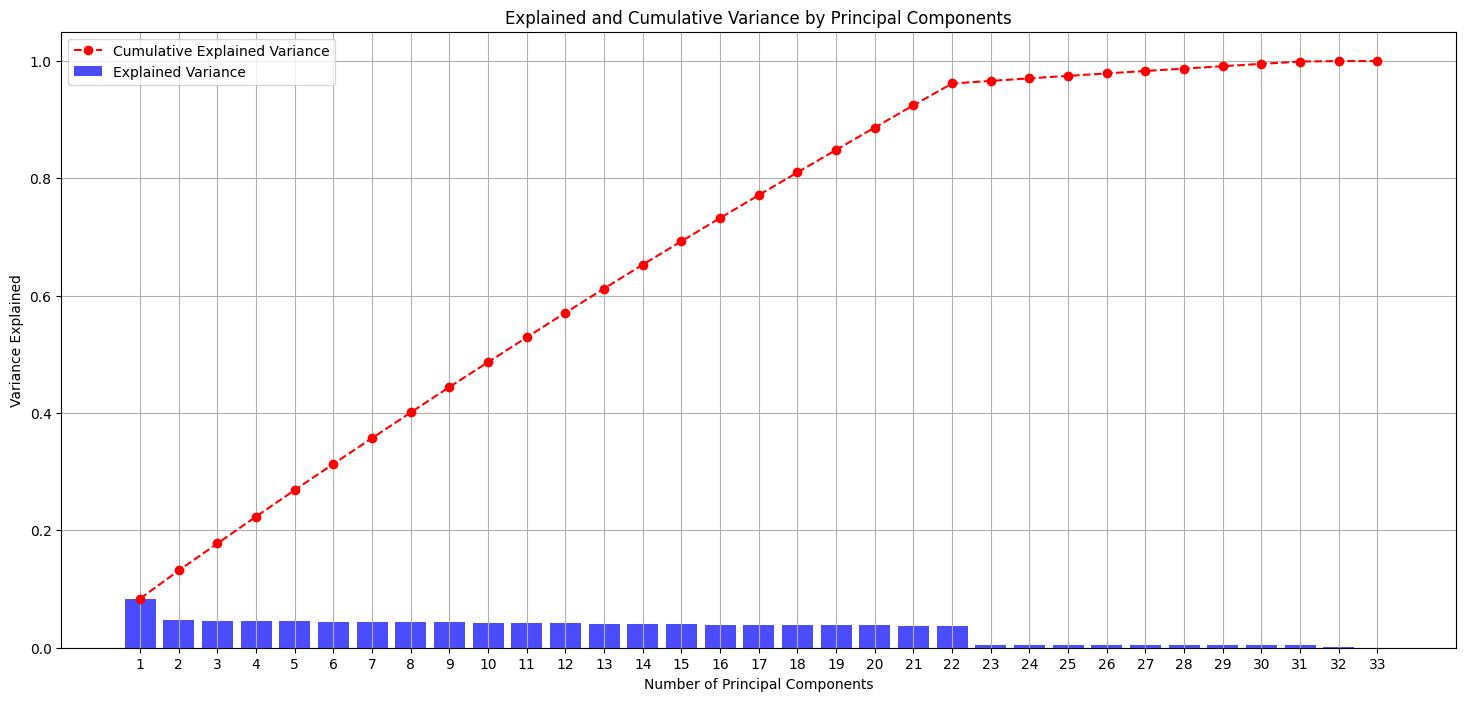


Explained Variance Analysis:
   Principal Component  Explained Variance Ratio  Cumulative Variance
0                  PC1                  0.083718             0.083718
1                  PC2                  0.047939             0.131657
2                  PC3                  0.046150             0.177807
3                  PC4                  0.045824             0.223631
4                  PC5                  0.045151             0.268783
5                  PC6                  0.044690             0.313473
6                  PC7                  0.043899             0.357372
7                  PC8                  0.043686             0.401058
8                  PC9                  0.043335             0.444392
9                 PC10                  0.042395             0.486787
10                PC11                  0.042338             0.529125
11                PC12                  0.041934             0.571059
12                PC13                  0.041157            

In [22]:
num_pcs = perform_pca_analysis(happiness_merged.drop(columns=['Year']))
print(f"\nMinimum number of PCA components needed for 90% variance: {num_pcs}")

When performing PCA analysis on whole cleaned dataset, we need at least `21` PCA components to explain `90%` of variance.

## Exploratory Data Analysis (EDA)

## Fitting Models

### Regression Models

#### 1. Linear Regression

#### 2. Multiple Linear Regression

### Classification Models

#### 3. Random Forest Trees

#### 4. Decision Trees

### Clustering Models

#### 5. K-Means

#### 6. K-Nearest Neighbors (KNN)

## Conclusions